In [1]:
import requests
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import lxml
from bs4 import BeautifulSoup
from bs4 import NavigableString
import seaborn as sns
import numpy as np
sns.set()

In [2]:
url="https://finance.yahoo.com/quote/5099.KL/history?p=5099.KL"

In [3]:
request = requests.get(url)
soup = BeautifulSoup(request.text, 'html.parser')

In [4]:
table_big = soup.find('table', attrs={'data-test':'historical-prices'})
soup.find('tfoot').decompose()

In [5]:
print(table_big)

<table class="W(100%) M(0)" data-reactid="31" data-test="historical-prices"><thead data-reactid="32"><tr class="C($c-fuji-grey-j) Fz(xs) Ta(end)" data-reactid="33"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="34"><span data-reactid="35">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">High</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Volume</span></th></tr></thead><tbody data-reactid="48"><tr class="BdT Bdc($c-fuji-grey-c) Ta(end) Fz(s) Whs(nw)" data-reactid="49"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="50"><span data-reactid="51">Aug 13,

In [6]:
rs = pd.read_html(str(table_big))
rs = rs[0].to_json(orient='records')

In [7]:
print(rs)

[{"Date":"Aug 13, 2018","Open":"3.43","High":"3.44","Low":"3.38","Close*":"3.39","Adj Close**":"3.39","Volume":"5306900"},{"Date":"May 07, 2018","Open":"3.69","High":"3.73","Low":"3.65","Close*":"3.70","Adj Close**":"3.70","Volume":"3620900"},{"Date":"May 04, 2018","Open":"3.73","High":"3.79","Low":"3.71","Close*":"3.71","Adj Close**":"3.71","Volume":"6019100"},{"Date":"May 03, 2018","Open":"3.82","High":"3.82","Low":"3.72","Close*":"3.72","Adj Close**":"3.72","Volume":"11624200"},{"Date":"May 02, 2018","Open":"3.84","High":"3.88","Low":"3.76","Close*":"3.83","Adj Close**":"3.83","Volume":"8070700"},{"Date":"Apr 30, 2018","Open":"4.00","High":"4.05","Low":"3.82","Close*":"3.85","Adj Close**":"3.85","Volume":"8971500"},{"Date":"Apr 27, 2018","Open":"3.78","High":"3.97","Low":"3.74","Close*":"3.97","Adj Close**":"3.97","Volume":"9699300"},{"Date":"Apr 26, 2018","Open":"3.66","High":"3.75","Low":"3.66","Close*":"3.74","Adj Close**":"3.74","Volume":"6005100"},{"Date":"Apr 25, 2018","Open":

In [8]:
df = pd.read_json(rs)

In [9]:
df = df[['Date','Open','High','Low','Close*','Adj Close**']]
date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()
df = df[df.Low != '-']
df.head()

,Date,Open,High,Low,Close*,Adj Close**
0,2018-08-13,3.43,3.44,3.38,3.39,3.39
1,2018-05-07,3.69,3.73,3.65,3.70,3.70
2,2018-05-04,3.73,3.79,3.71,3.71,3.71
3,2018-05-03,3.82,3.82,3.72,3.72,3.72
4,2018-05-02,3.84,3.88,3.76,3.83,3.83


In [10]:
df = df.sort_values(by='Date', ascending=1)
df.set_index('Date')

,Open,High,Low,Close*,Adj Close**
Date,,,,,
2017-12-14,3.25,3.28,3.23,3.26,3.26
2017-12-15,3.26,3.35,3.24,3.35,3.35
2017-12-18,3.34,3.39,3.31,3.38,3.38
2017-12-19,3.38,3.38,3.30,3.30,3.30
2017-12-20,3.31,3.34,3.29,3.33,3.33
2017-12-21,3.33,3.34,3.28,3.30,3.30
2017-12-22,3.31,3.34,3.30,3.31,3.31
2017-12-25,3.31,3.31,3.31,3.31,3.31
2017-12-26,3.32,3.33,3.29,3.29,3.29


In [11]:
print (df.dtypes)

Date           datetime64[ns]
Open                   object
High                   object
Low                    object
Close*                 object
Adj Close**            object
dtype: object


In [12]:
print(df)

         Date  Open  High   Low Close* Adj Close**
99 2017-12-14  3.25  3.28  3.23   3.26        3.26
98 2017-12-15  3.26  3.35  3.24   3.35        3.35
97 2017-12-18  3.34  3.39  3.31   3.38        3.38
96 2017-12-19  3.38  3.38  3.30   3.30        3.30
95 2017-12-20  3.31  3.34  3.29   3.33        3.33
94 2017-12-21  3.33  3.34  3.28   3.30        3.30
93 2017-12-22  3.31  3.34  3.30   3.31        3.31
92 2017-12-25  3.31  3.31  3.31   3.31        3.31
91 2017-12-26  3.32  3.33  3.29   3.29        3.29
90 2017-12-27  3.30  3.34  3.30   3.30        3.30
89 2017-12-28  3.31  3.35  3.30   3.33        3.33
88 2017-12-29  3.33  3.38  3.32   3.35        3.35
87 2018-01-02  3.35  3.36  3.31   3.34        3.34
86 2018-01-03  3.34  3.44  3.34   3.41        3.41
85 2018-01-04  3.42  3.50  3.41   3.49        3.49
84 2018-01-05  3.50  3.59  3.48   3.59        3.59
83 2018-01-08  3.59  3.60  3.54   3.59        3.59
82 2018-01-09  3.61  3.76  3.60   3.74        3.74
81 2018-01-10  3.75  3.80  3.70

In [13]:
date_ori = df['Date']

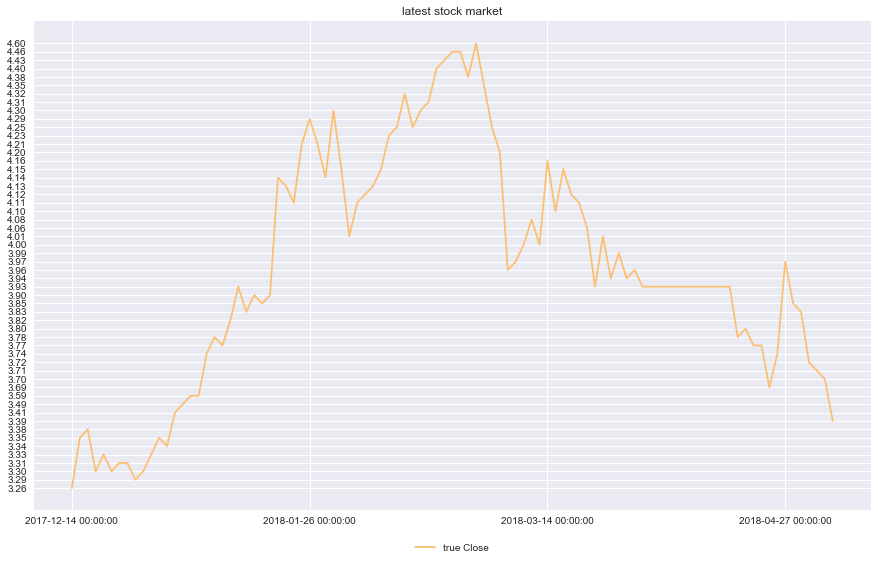

In [14]:
current_palette = sns.color_palette("Paired", 12)
fig = plt.figure(figsize = (15,10))
ax = plt.subplot(111)
x_range_original = np.arange(df.shape[0])
# ax.plot(x_range_original, df.iloc[:, 1], label = 'true Open', color = current_palette[0])
# ax.plot(x_range_original, df.iloc[:, 2], label = 'true High', color = current_palette[2])
# ax.plot(x_range_original, df.iloc[:, 3], label = 'true Low', color = current_palette[4])
ax.plot(x_range_original, df.iloc[:, 4], label = 'true Close', color = current_palette[6])
# ax.plot(x_range_original, df.iloc[:, 5], label = 'true Adj Close', color = current_palette[8])
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc = 'upper center', bbox_to_anchor= (0.5, -0.05), fancybox = True, shadow = True, ncol = 5)
plt.title('latest stock market')
plt.xticks(x_range_original[::30], date_ori[::30])
plt.show()